Liên kết đến thư mục dataset: https://drive.google.com/drive/folders/1ybbFPMaHNII8DnMKbuUmAyeuGJwuMvsf?usp=sharing

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from math import nan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = './drive/MyDrive/movie_lens_sm'
ratings = pd.read_csv(dataset_path + '/ratings.csv')
movies = pd.read_csv(dataset_path + '/movies.csv', index_col=0)
ratings.drop(columns='timestamp', axis=1, inplace=True)

In [ ]:
ratings

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [ ]:
movie_rating_count = pd.DataFrame(ratings.groupby('movieId')['rating'].mean())
movie_rating_count['count'] = pd.DataFrame(ratings.groupby('movieId')['rating'].count())

In [ ]:
movie_rating_count

,rating,count
movieId,,
1,3.920930,215
2,3.431818,110
3,3.259615,52
4,2.357143,7
5,3.071429,49
...,...,...
193581,4.000000,1
193583,3.500000,1
193585,3.500000,1


In [ ]:
for i in ratings.index:
  if ratings['movieId'][i] in movie_rating_count[movie_rating_count['count']<10].index:
    ratings.drop(i, inplace=True)

Kết quả sau khi chạy dòng trên

In [ ]:
ratings = pd.read_csv(dataset_path + '/processed_ratings.csv', index_col=0)

In [ ]:
ratings

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100818,610,159093,3.0
100829,610,164179,5.0
100830,610,166528,4.0
100833,610,168250,5.0


In [ ]:
uids = np.unique(ratings.userId)
random_state = 16
train = pd.DataFrame(columns=ratings.columns)
test = pd.DataFrame(columns=ratings.columns)

for i in uids:
  X_train, X_test = train_test_split(ratings.loc[ratings['userId'] == i],
                                     test_size=0.2, random_state=random_state)
  train = train.append(X_train)
  test = test.append(X_test)

In [ ]:
test

,userId,movieId,rating
166,1,2571,5.0
173,1,2641,5.0
29,1,543,4.0
194,1,2987,5.0
76,1,1219,2.0
...,...,...,...
100122,610,31878,5.0
99572,610,541,5.0
100073,610,8985,2.5
99817,610,4299,3.0


In [ ]:
rating_mean_count = pd.DataFrame(train.groupby('userId')['rating'].mean())
rating_mean_count['count'] = pd.DataFrame(train.groupby('userId')['rating'].count())

In [ ]:
rating_mean_count

,rating,count
userId,,
1,4.380952,168
2,4.000000,20
3,1.078947,19
4,3.594406,143
5,3.685714,35
...,...,...
606,3.679208,505
607,3.794118,136
608,3.179832,595


In [ ]:
user_movies_rating = train.pivot_table(index='movieId', columns='userId', values='rating')

In [ ]:
user_movies_rating

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,NaN,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
6,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def find_related_user(user_id, rating_amount=20):
  movie_ratings = user_movies_rating[user_id]
  likely = user_movies_rating.corrwith(movie_ratings, method='pearson')
  correlation = pd.DataFrame(likely, columns=['Correlation'])
  correlation.dropna(inplace=True)

  final = pd.merge(correlation, rating_mean_count, on='userId').drop(columns=['rating'])
  final = final[final['Correlation']>0.5]
  return final[final['count']>rating_amount].sort_values('Correlation', ascending=False)[1:]

In [ ]:
find_related_user(1)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,count
userId,,
146,1.000000,24
209,1.000000,25
581,1.000000,32
319,1.000000,28
366,1.000000,24
...,...,...
262,0.522233,40
113,0.516398,80
199,0.511119,252


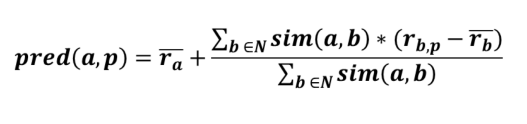

In [ ]:
def predict(userId, movieid):
  related_user = find_related_user(userId)
  related_user['rating_on_movie'] = [user_movies_rating[i][movieid] for i in related_user.index]
  related_user.dropna(inplace=True)
  if len(related_user) == 0:
    return nan
  u = 0
  d = 0
  for i in related_user.index[0:5]:
    u += related_user['Correlation'][i]*(related_user['rating_on_movie'][i] - rating_mean_count['rating'][i])
    d += related_user['Correlation'][i]
  print(userId, '||', movieid)
  pred = rating_mean_count['rating'][userId] + (u/d)
  if pred > 5:
    pred = 5.0
  return pred

In [ ]:
test['pred'] = [ predict(test['userId'][i], test['movieId'][i]) for i in test.index]

In [ ]:
print(len(test))
test.dropna(inplace=True)
test.to_csv('test_predict.csv')
print(len(test))

Kết quả sau khi run 2 dòng trên

In [ ]:
test

,userId,movieId,rating
166,1,2571,5.0
173,1,2641,5.0
29,1,543,4.0
194,1,2987,5.0
76,1,1219,2.0
...,...,...,...
100122,610,31878,5.0
99572,610,541,5.0
100073,610,8985,2.5
99817,610,4299,3.0


In [ ]:
test = pd.read_csv(dataset_path + '/test_predict.csv', index_col=0)
test

,userId,movieId,rating,pred
166,1,2571,5.0,4.761023
173,1,2641,5.0,3.783843
29,1,543,4.0,3.499799
194,1,2987,5.0,3.869989
76,1,1219,2.0,4.528645
...,...,...,...,...
100122,610,31878,5.0,4.549510
99572,610,541,5.0,4.991117
100073,610,8985,2.5,3.204246
99817,610,4299,3.0,3.601230


In [ ]:
mse = mean_squared_error(test.rating, test.pred)
mse

0.9374382601374409

In [ ]:
dt = df.DataFrame